In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
gdp = pd.read_csv('../GDP.csv')
inflation = pd.read_csv('../inflation_monthly.csv')
apple = pd.read_csv('../apple_historical_data.csv')
microsoft = pd.read_csv('../microsoft_historical_data.csv')
cpi = pd.read_csv('../consumer_price_index.csv')

In [3]:
# Check the first few rows of data
print(gdp.head())

         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742


In [4]:
print("\nGDP Info:")
print(gdp.info())


GDP Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    309 non-null    object 
 1   GDP     309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
None


In [5]:
# Check the first few rows of data
print("\nApple Data:")
print(apple.head())
print("\nMicrosoft Data:")
print(microsoft.head())


Apple Data:
        Date Close/Last     Volume      Open      High       Low
0   5/3/2024   $183.38   163224100  $186.65   $187.00   $182.66 
1   5/2/2024   $173.03    94214920  $172.51   $173.42   $170.89 
2   5/1/2024   $169.30    50383150  $169.58   $172.71   $169.11 
3  4/30/2024   $170.33    65934780  $173.33   $174.99   $170.00 
4  4/29/2024   $173.50    68169420  $173.37   $176.03   $173.10 

Microsoft Data:
         Date Close/Last    Volume     Open       High        Low
0  05/03/2024    $406.66  17446720  $402.28    $407.15    $401.86
1  05/02/2024    $397.84  17709360  $397.66    $399.93  $394.6515
2  05/01/2024    $394.94  23562480  $392.61  $401.7199    $390.31
3  04/30/2024    $389.33  28781370  $401.49    $402.16    $389.17
4  04/29/2024    $402.25  19582090  $405.25    $406.32    $399.19


In [6]:
# Use methods like .info() and .describe() to explore the data
print("\nApple Info:")
print(apple.info())
print("\nApple Describe:")
print(apple.describe())
print("\nMicrosoft Info:")
print(microsoft.info())
print("\nMicrosoft Describe:")
print(microsoft.describe())


Apple Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB
None

Apple Describe:
             Volume
count  2.517000e+03
mean   1.277394e+08
std    7.357405e+07
min    2.404834e+07
25%    7.741776e+07
50%    1.077601e+08
75%    1.567789e+08
max    7.576780e+08

Microsoft Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 no

In [7]:
# Check for nulls
print("\nNulls in Apple Data Before:")
print(apple.isnull().sum())


Nulls in Apple Data Before:
Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [8]:
print("\nNull Values in Microsoft Stock Data:")
print(microsoft.isnull().sum())


Null Values in Microsoft Stock Data:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [9]:
# Forward fill any missing data
apple.ffill(inplace=True)

In [10]:
# Check again for nulls after using forward fill
print("\nNulls in Apple Data After:")
print(apple.isnull().sum())


Nulls in Apple Data After:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [11]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        # Remove dollar signs and convert to numeric
        df[col] = df[col].replace({'\$': '', '': None}, regex=True).astype(float)
    
    pass 

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_25352\1064846386.py:15: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', '': None}, regex=True).astype(float)


In [12]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft dataset
convert_dollar_columns_to_numeric(apple, ['Close/Last', 'Open', 'High', 'Low'])  
convert_dollar_columns_to_numeric(microsoft, ['Close/Last', 'Open', 'High', 'Low'])  
apple[['Close/Last', 'Open', 'High', 'Low']]
microsoft[['Close/Last', 'Open', 'High', 'Low']]

,Close/Last,Open,High,Low
0,406.660,402.28,407.1500,401.8600
1,397.840,397.66,399.9300,394.6515
2,394.940,392.61,401.7199,390.3100
3,389.330,401.49,402.1600,389.1700
4,402.250,405.25,406.3200,399.1900
...,...,...,...,...
2512,39.970,39.74,40.0200,39.6500
2513,39.540,39.54,39.8500,39.3700
2514,39.640,39.34,39.9000,38.9700
2515,39.425,39.22,39.5100,38.5100


In [13]:
print(apple.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB
None


In [14]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
# Convert the 'Date' column to datetime format
apple['Date'] = pd.to_datetime(apple['Date'])
microsoft['Date'] = pd.to_datetime(microsoft['Date'])

In [15]:
# Use .info() and check the type of each column to ensure that the above steps worked
print("\nApple Data Types After Conversion:")
print(apple.info())
print("\nMicrosoft Data Types After Conversion:")
print(microsoft.info())


Apple Data Types After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None

Microsoft Data Types After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open   

In [16]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
from pandas.tseries.offsets import MonthEnd
inflation['DATE'] = pd.to_datetime(inflation['DATE']) + MonthEnd(0)
print("\nAdjusted Inflation Dates:")
print(inflation.head())


Adjusted Inflation Dates:
        DATE  Inflation_Rate
0 1968-01-31        3.651861
1 1968-02-29        3.673819
2 1968-03-31        4.142164
3 1968-04-30        4.155828
4 1968-05-31        4.088245


In [17]:
# Upsample and interpolate from monthly to weekly

inflation.set_index('DATE', inplace=True)

# Resample to weekly frequency and interpolate missing values
weekly_inflation = inflation.resample('W').interpolate(method='linear')



In [18]:
# Downsample from monthly to quarterly 
quarterly_inflation = inflation.resample('Q').mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_25352\1247806529.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_inflation = inflation.resample('Q').mean()


In [19]:
print("\nQuarterly Inflation Sample:")
quarterly_inflation


Quarterly Inflation Sample:


,Inflation_Rate
DATE,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770
...,...
2023-03-31,6.467833
2023-06-30,5.942054
2023-09-30,5.179249


In [20]:
# Standardize the GDP measure
gdp['GDP_standardized'] = (gdp['GDP'] - gdp['GDP'].mean()) / gdp['GDP'].std()


In [21]:
# Check the dataframe to make sure the calculation worked as expected 
print("\nSummary Statistics for Standardized GDP:")
print(gdp['GDP_standardized'].describe())

# Verify the mean and standard deviation
print("\nMean of Standardized GDP:", gdp['GDP_standardized'].mean())
print("Standard Deviation of Standardized GDP:", gdp['GDP_standardized'].std())


Summary Statistics for Standardized GDP:
count    3.090000e+02
mean    -1.379695e-16
std      1.000000e+00
min     -9.339814e-01
25%     -8.588551e-01
50%     -3.798969e-01
75%      7.086451e-01
max      2.815713e+00
Name: GDP_standardized, dtype: float64

Mean of Standardized GDP: -1.3796946325438837e-16
Standard Deviation of Standardized GDP: 1.0000000000000002


In [22]:
# Get max date in timeseries
max_date = apple['Date'].max()
print("\nMax Date in Time Series:", max_date)


Max Date in Time Series: 2024-05-03 00:00:00


In [23]:
print("Date Range in Dataset:")
print("Min Date:", apple['Date'].min())
print("Max Date:", apple['Date'].max())

Date Range in Dataset:
Min Date: 2014-05-06 00:00:00
Max Date: 2024-05-03 00:00:00


In [24]:
# Use the max date calculated above to get the last three months of data in the dataset 
last_three_months = apple[apple['Date'] >= (max_date - pd.DateOffset(months=3))]

#  filtered data
print("\nLast Three Months of Data:")
last_three_months


Last Three Months of Data:


,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
58,2024-02-09,188.85,45155220,188.65,189.99,188.00
59,2024-02-08,188.32,40962050,189.39,189.54,187.35
60,2024-02-07,189.41,53438960,190.64,191.05,188.61
61,2024-02-06,189.30,43490760,186.86,189.31,186.77


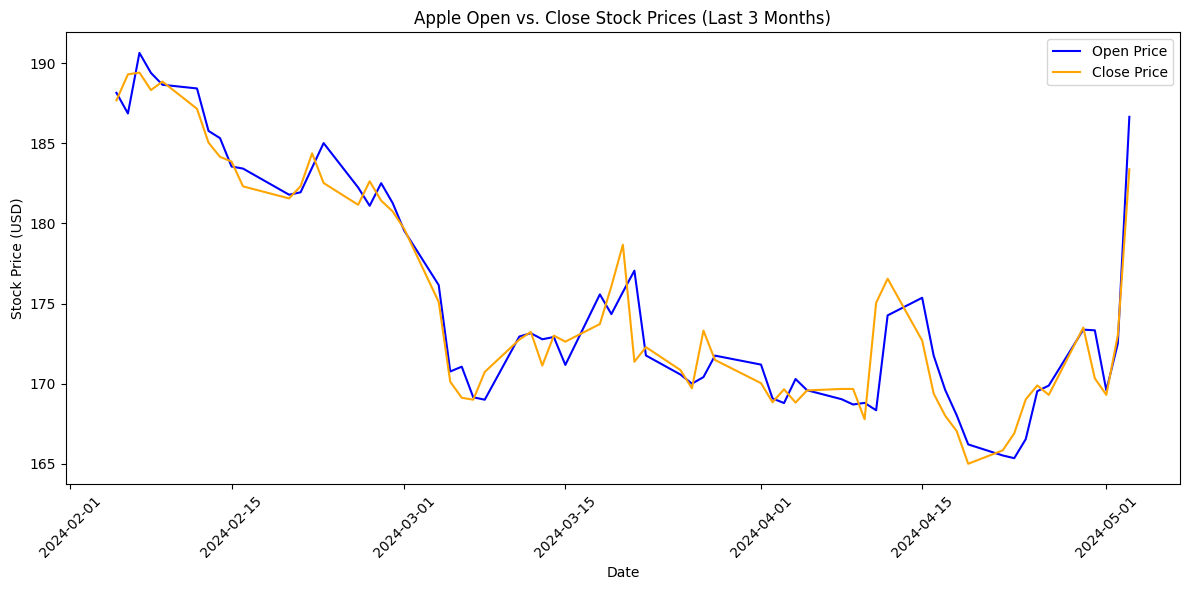

In [25]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
import matplotlib.pyplot as plt

# Plot time series of open vs. close stock price for Apple
plt.figure(figsize=(12, 6))

# Plot the open price
plt.plot(last_three_months['Date'], last_three_months['Open'], label='Open Price', color='blue')

# Plot the close price
plt.plot(last_three_months['Date'], last_three_months['Close/Last'], label='Close Price', color='orange')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Apple Open vs. Close Stock Prices (Last 3 Months)')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
apple['Daily Return'] = apple['Close/Last'].pct_change()
microsoft['Daily Return'] = microsoft['Close/Last'].pct_change()



In [27]:
# Calculate percent change in inflation from month to month
inflation['Monthly Percent Change'] = inflation['Inflation_Rate'].pct_change()

In [28]:
# Display the first few rows of each dataset to verify calculations
print("\nApple Daily Returns:")
print(apple[['Date', 'Daily Return']].head())

print("\nMicrosoft Daily Returns:")
print(microsoft[['Date', 'Daily Return']].head())




Apple Daily Returns:
        Date  Daily Return
0 2024-05-03           NaN
1 2024-05-02     -0.056440
2 2024-05-01     -0.021557
3 2024-04-30      0.006084
4 2024-04-29      0.018611

Microsoft Daily Returns:
        Date  Daily Return
0 2024-05-03           NaN
1 2024-05-02     -0.021689
2 2024-05-01     -0.007289
3 2024-04-30     -0.014205
4 2024-04-29      0.033185


In [29]:
#Interpolate stock returns from daily to monthly

apple['Date'] = pd.to_datetime(apple['Date'])
microsoft['Date'] = pd.to_datetime(microsoft['Date'])

apple.set_index('Date', inplace=True)
microsoft.set_index('Date', inplace=True)
apple_monthly_returns = apple['Daily Return'].resample('M')
microsoft_monthly_returns = microsoft['Daily Return'].resample('M')
print("Apple Monthly Returns:")
print(apple_monthly_returns)

print("\nMicrosoft Monthly Returns:")
print(microsoft_monthly_returns)

Apple Monthly Returns:
DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]

Microsoft Monthly Returns:
DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


C:\Users\Admin\AppData\Local\Temp\ipykernel_25352\2987702950.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_monthly_returns = apple['Daily Return'].resample('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_25352\2987702950.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  microsoft_monthly_returns = microsoft['Daily Return'].resample('M')


In [30]:
# Merge the dataframes and calculate / plot the correlation
merged_df = pd.merge(apple, microsoft,  on='Date', how='inner')


                Close/Last_x  Volume_x    Open_x    High_x     Low_x  \
Close/Last_x        1.000000 -0.510154  0.999687  0.999850  0.999855   
Volume_x           -0.510154  1.000000 -0.509389 -0.506502 -0.513245   
Open_x              0.999687 -0.509389  1.000000  0.999871  0.999851   
High_x              0.999850 -0.506502  0.999871  1.000000  0.999814   
Low_x               0.999855 -0.513245  0.999851  0.999814  1.000000   
Daily Return_x      0.020493 -0.012373  0.020203  0.020068  0.019270   
Close/Last_y        0.978419 -0.520587  0.978067  0.977956  0.978622   
Volume_y           -0.089607  0.494782 -0.088398 -0.085593 -0.092342   
Open_y              0.978201 -0.520005  0.978274  0.977996  0.978634   
High_y              0.978711 -0.518011  0.978611  0.978474  0.979010   
Low_y               0.978032 -0.522633  0.977899  0.977660  0.978431   
Daily Return_y      0.018816  0.015435  0.017388  0.017696  0.017205   

                Daily Return_x  Close/Last_y  Volume_y    Open_

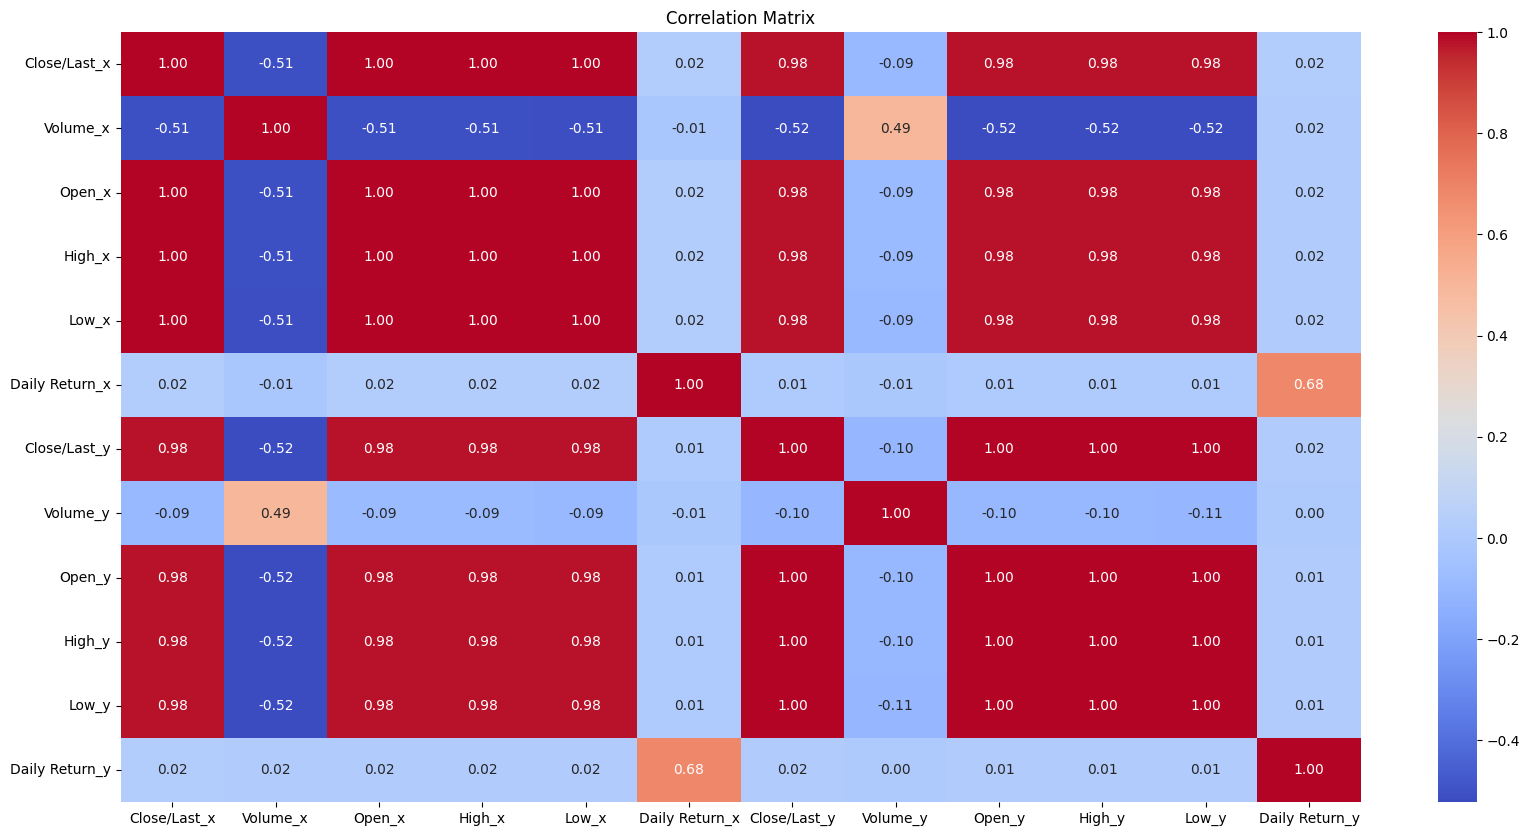

In [31]:


# Calculate and plot the correlation
correlation = merged_df.corr()
print(correlation)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation Matrix')
plt.show()

In [32]:
# Define the window size for the rolling calculation (e.g., one week)
apple['Daily_Return'] = apple['Close/Last'].pct_change()
trading_days_per_week = 5  # Standard market days
rolling_window = trading_days_per_week  # 1-week window


In [33]:
print (apple.columns)

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low', 'Daily Return',
       'Daily_Return'],
      dtype='object')


In [34]:
# Calculate rolling one-week volatility
window_size = 5  # Weekly window
apple['Rolling_Volatility'] = apple['Daily_Return'].rolling(window=rolling_window).std()

In [37]:
apple.sort_index(inplace=True)



In [38]:
apple.head()

,Close/Last,Volume,Open,High,Low,Daily Return,Daily_Return,Rolling_Volatility
Date,,,,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23,0.003783,0.003783,0.007714
2014-05-07,21.15,282128727,21.26,21.33,20.99,0.007143,0.007143,0.007458
2014-05-08,21.00,228973884,21.01,21.23,20.94,0.004304,0.004304,0.007840
2014-05-09,20.91,291068564,20.88,20.94,20.73,-0.012282,-0.012282,0.009455
2014-05-12,21.17,212736019,20.98,21.20,20.98,-0.001886,-0.001886,0.009306


In [39]:
apple = apple.dropna(subset=['Rolling_Volatility'])

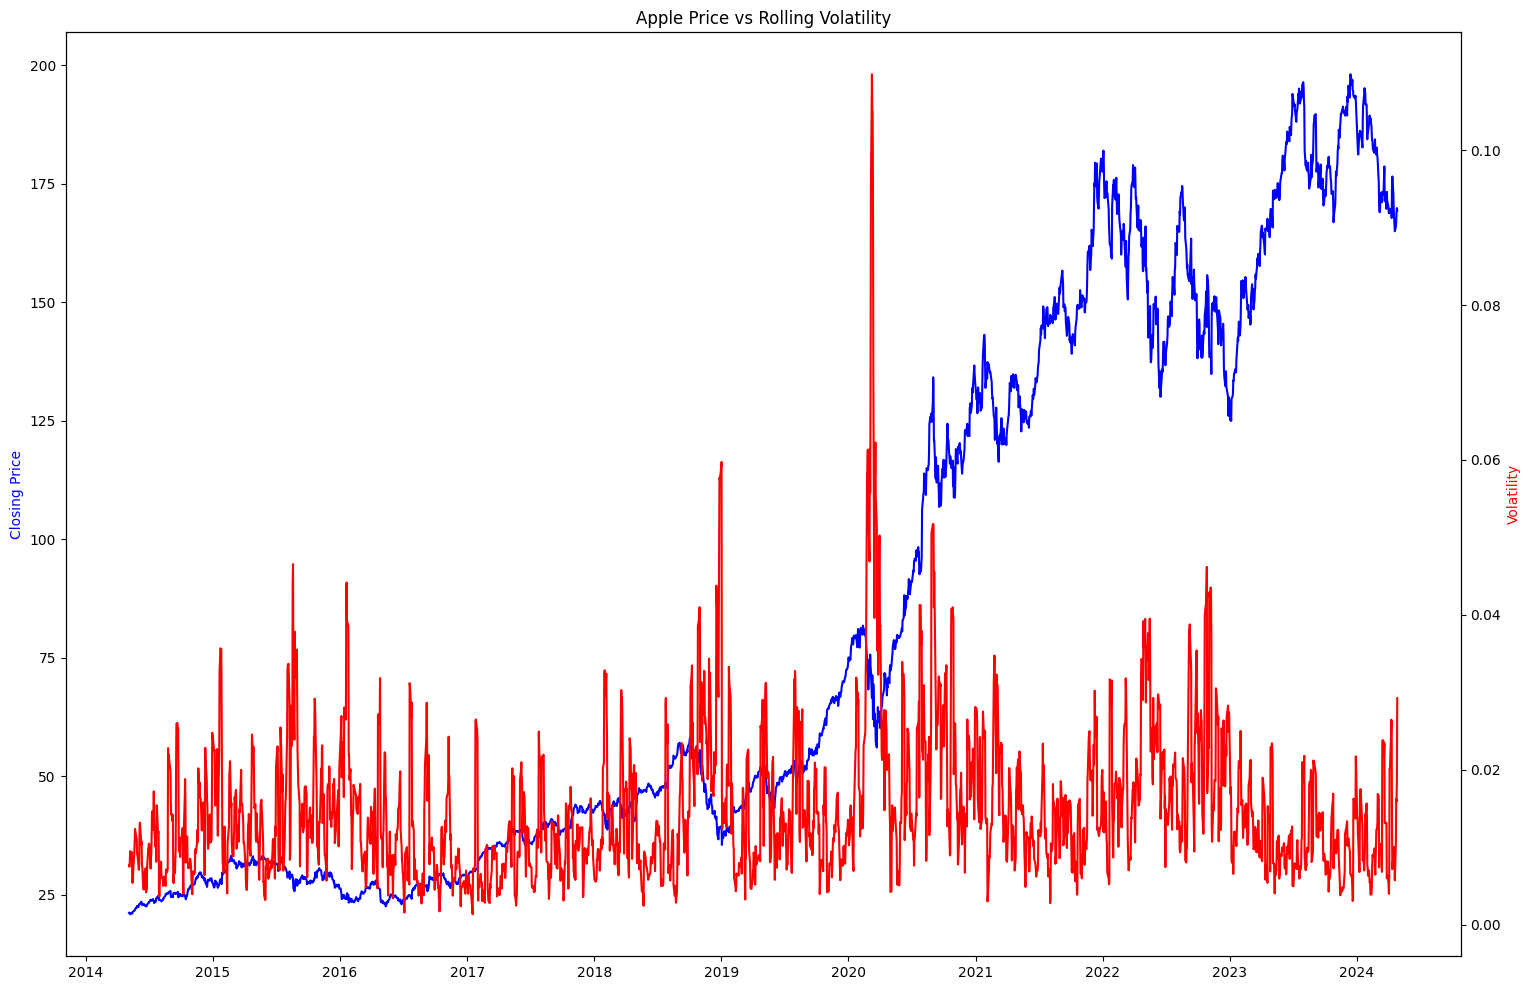

In [40]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
fig, ax1 = plt.subplots(figsize=(18,12))
ax1.plot(apple['Close/Last'], 'b-')
ax1.set_ylabel('Closing Price', color='b')

ax2 = ax1.twinx()
ax2.plot(apple['Rolling_Volatility'], 'r-')
ax2.set_ylabel('Volatility', color='r')
plt.title('Apple Price vs Rolling Volatility')
plt.show()

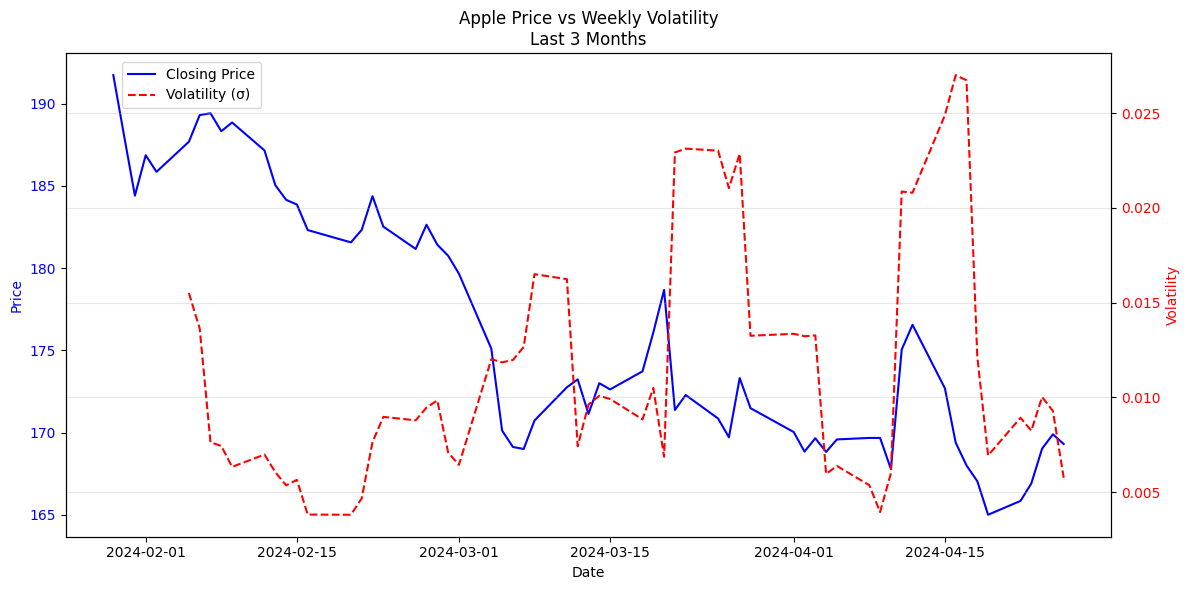

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter last 3 months data (63 trading days)
apple_3m = apple['Close/Last'].iloc[-63:]

# Calculate weekly volatility (5 trading days window)
apple_3m_returns = apple_3m.pct_change()
weekly_volatility = apple_3m_returns.rolling(window=5).std()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Closing Price (Left Axis)
ax1.plot(apple_3m.index, apple_3m, 'b-', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Volatility (Right Axis)
ax2 = ax1.twinx()
ax2.plot(weekly_volatility.index, weekly_volatility, 
        'r--', label='Volatility (σ)')
ax2.set_ylabel('Volatility', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Formatting
plt.title('Apple Price vs Weekly Volatility\nLast 3 Months')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [42]:
# Export data
gdp.to_csv('processed_gdp.csv', index=False)
apple.to_csv('processed_apple.csv', index=False)
microsoft.to_csv('processed_microsoft.csv', index=False)
inflation.to_csv('processed_inflation.csv')
weekly_inflation.to_csv('weekly_inflation.csv')
quarterly_inflation.to_csv('quarterly_inflation.csv')